In [18]:
import numpy as np
import cv2
import numpy as np 
from matplotlib import pyplot as plt

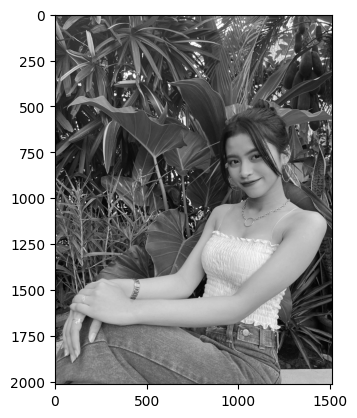

In [19]:
img = cv2.imread("img/img.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()

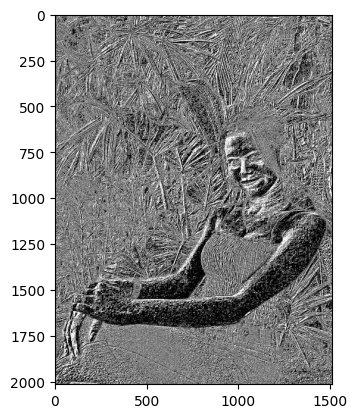

In [20]:
def derivative(X, direction):
    if(direction == 0):
        for idx in range(X.shape[0] - 1):
            X[idx,0:X.shape[1]] = X[idx, 0:X.shape[1]] - X[idx + 1, 0:X.shape[1]]
    else:
        for idx in range(X.shape[1] - 1):
            X[0:X.shape[0], idx] = X[0:X.shape[0], idx] - X[0:X.shape[0], idx + 1]
    return X
    
imgX = derivative(img.copy(), 0)
imgY = derivative(img.copy(), 1)

def energy(X, Y):
    D = X[:] + Y[:]
    return D

energy_matrix = np.array(energy(imgX, imgY))
plt.imshow(energy_matrix, cmap='gray')
plt.show()

(2015, 1511)
(2015, 1511)
2015
0
23917


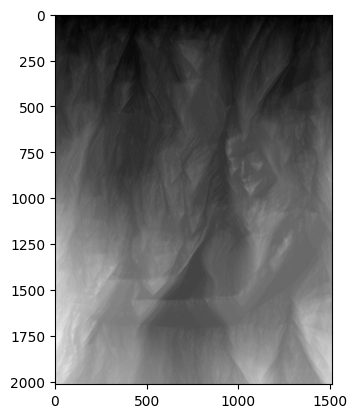

In [21]:
M = [[0 for x in range(img.shape[1])] for y in range(img.shape[0])]
print(np.shape(M))
print(np.shape(energy_matrix))
print(img.shape[0])
for idy in range(img.shape[1]):
    M[0][idy] = energy_matrix[0][idy]
for idx in range(1,img.shape[0]):
    for idy in range(img.shape[1]):
        v1 = M[idx-1][idy] if idx-1 >= 0 else 10000000
        v2 = M[idx-1][idy-1] if idx -1 >= 0 and idy - 1 > 0 else 10000000
        v3 = M[idx-1][idy+1] if idx -1 >= 0 and idy + 1 < img.shape[1] else 10000000
        M[idx][idy] = min(v1,v2,v3) + int(energy_matrix[idx][idy])
print(np.min(M[:-1]))
print(np.max(M[:-1]))
plt.imshow(M, cmap='gray')
plt.show()

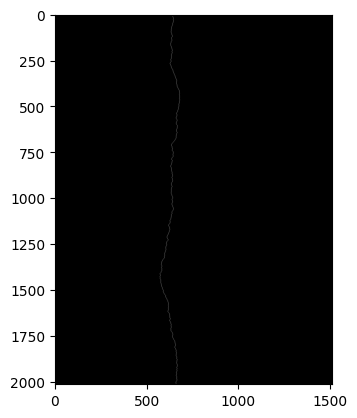

In [23]:
idy = 0
val = 1000000000
t = img.shape[0] - 1
for id in range(img.shape[1]):
    if M[t][id] < val:
        val = M[t][id]
        idy = id
seam_path = [[0 for x in range(img.shape[1])] for y in range(img.shape[0])]
while (t > 0):
    seam_path[t][idy] = 255 
    v1 = M[t-1][idy] if t - 1 >= 0 else 10000000
    v2 = M[t-1][idy-1] if t -1 >= 0 and idy - 1 > 0 else 10000000
    v3 = M[t-1][idy+1] if t -1 >= 0 and idy + 1 < img.shape[1] else 10000000
    t -= 1
    if(v1 > v2 and v1 > v3):
        continue
    if(v2 > v1 and v2 > v3):
        idy -= 1
        continue
    if(v3 > v1 and v3 > v2):
        idy += 1  
        continue
plt.imshow(seam_path, cmap='gray')
plt.show()